# Lab | Cleaning numerical data


#### Context
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

#### Some business Objectives:
Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

#### Data Analysis Process
Remember the process:
Case Study
Get data
Cleaning/Wrangling/EDA
Processing Data
Modeling -Validation
Reporting

#### Instructions
1. Import the necessary libraries.

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

3. First look at its main features (head, shape, info). NOTE The target column is total_claim_amount

4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

5. Change effective to date column to datetime format.

6. Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.

7. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

8. Plot a correlation matrix, comment what you see.

9. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

10. Comment what you can see in the plots.

11. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

14. Save the numerical_df to csv as numerical.csv You will use this file again this week.

## 1. Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

## 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

In [3]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

## 3. First look at its main features (head, shape, info). 
(NOTE The **target column is total_claim_amount**)

In [4]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
customer_df.shape

(9134, 24)

In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

#### Overview Observations:

Regarding the dtypes and the general information provided in the output of customer_df.info(), there are several points to highlight:

- Data Types (Dtype): Most of the columns are of type 'object,' which in pandas indicates that they can be text strings or mixtures of different types (e.g., text with numbers). However, some columns like Income, Months Since Last Claim, Months Since Policy Inception, Number of Open Complaints, Number of Policies are of type 'int64,' indicating that they are integers.

- Numeric Columns: There are columns that clearly contain numeric data (e.g., Customer Lifetime Value, Total Claim Amount) with 'float64' dtype, indicating they are floating-point numbers (real numbers).

- Effective To Date Column: This column should be of 'datetime' type and not 'object' since it represents dates. This will make any operations involving dates later on (such as sorting, calculating time spans, etc.) easier.

- No Null Values: According to the provided information, there are no null values (NaN) in any of the columns. However, this doesn't rule out the possibility of there being values representing nulls in some other form, like empty strings or markers such as "?".

- Consistency in Column Names: To follow the PE8 standard (PEP 8 for Python, assuming it refers to variable and column naming conventions), the column names should be renamed to use snake_case instead of having spaces and capital letters. This involves replacing spaces with underscores (_) and converting all letters to lowercase.

In summary, it is necessary to change the data type of the 'Effective To Date' column to datetime. Additionally, it would be advisable to standardize column names to adhere to code style conventions.

In [7]:
# Convert 'Effective To Date' column to datetime

customer_df['Effective To Date'] = pd.to_datetime(customer_df['Effective To Date'])

# Check the conversion

customer_df["Effective To Date"].head()

0   2011-02-24
1   2011-01-31
2   2011-02-19
3   2011-01-20
4   2011-02-03
Name: Effective To Date, dtype: datetime64[ns]

## 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [8]:
customer_df.columns = [column.lower().replace(" ", "_") for column in customer_df.columns]

In [9]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 5. Change effective to date column to datetime format.

In [10]:
# Already done in cell 7

## 6. Create a NEW dataframe using only the numerical data called numerical_df.

In [11]:
numerical_df = customer_df.select_dtypes(include=[np.number])
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


## 7. Define a function that differentiates between continuous and discrete variables. 

Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [12]:
"""
    Separates columns of a DataFrame into continuous and discrete variables based on the number of unique values.

    Parameters:
    -----------
    df : DataFrame
        The input DataFrame containing numerical variables.

    Returns:
    --------
    continuous_df : DataFrame
        DataFrame containing columns with a high number of unique values (continuous variables).
    discrete_df : DataFrame
        DataFrame containing columns with a limited number of unique values (discrete variables).

"""

def differentiate_variables(df):
    
    continuous_vars = df.columns[df.nunique() > 10]
    discrete_vars = df.columns[df.nunique() <= 10]
    
    return df[continuous_vars], df[discrete_vars]

In [13]:
# Apply the function

continuous_df, discrete_df = differentiate_variables(numerical_df)

In [14]:
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [15]:
discrete_df.head()

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


## 8. Plot a correlation matrix, comment what you see.

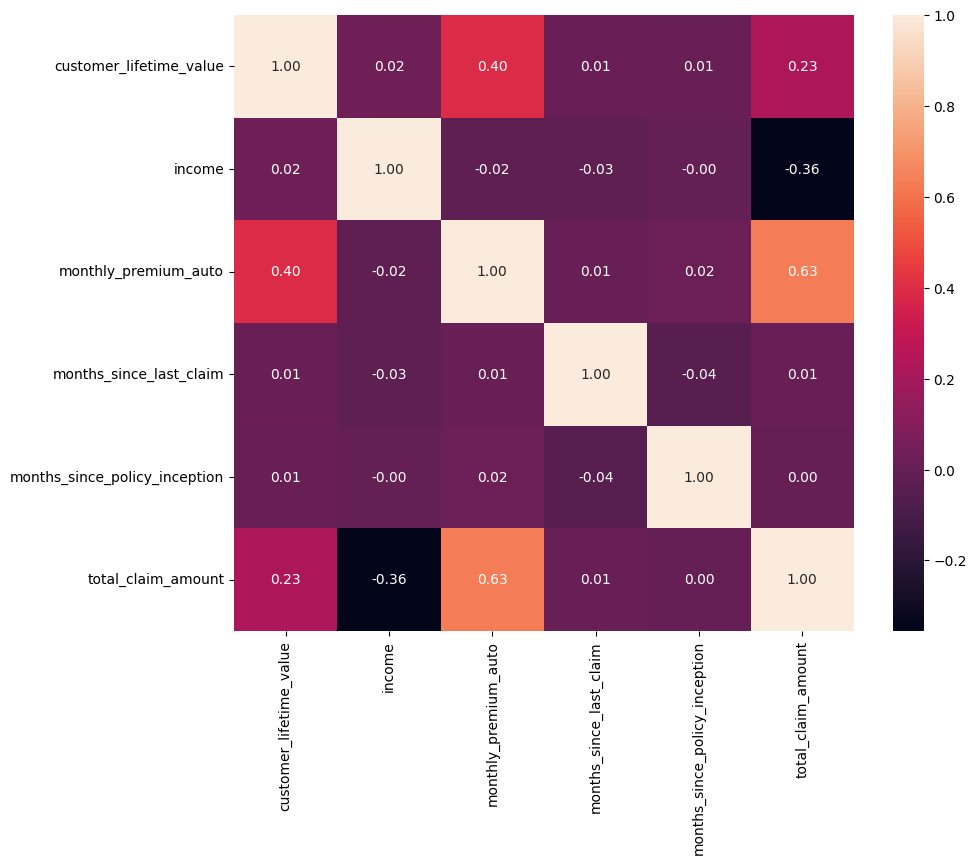

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(continuous_df.corr(), annot=True, fmt='.2f')
plt.show()

### Overview Observations:

**1. monthly_premium_auto AND total_claim_amount:** There is a moderate positive correlation (0.63) indicating that as monthly_premium_auto increases, the total_claim_amount tends to increase as well.

**2. customer_lifetime_value AND monthly_premium_auto:** A weaker positive correlation (0.40) is observed, suggesting customers with a higher lifetime value may also have higher monthly premiums, though this relationship isn't particularly strong.

**3. total_claim_amount AND income:** A moderate negative correlation (-0.36) is present, which could imply that as income increases, the total claim amount tends to decrease. This might indicate that those with higher income may have fewer or lesser value claims.

**4. Low Correlations:** Most of the other variables show very low correlations with each other (close to 0), indicating there is no strong linear relationship between these variables.

**There don't appear to be clear indications of multicollinearity among this variables.**

## 9. Create a function to plot every discrete variable. Do the same with the continuous variables.
(Be Careful, you may need to change the plot type to one better suited for continuous data!)

In [17]:
def plot_discrete(df):
    for column in df.columns:
        sns.countplot(x=df[column], palette="Set3")
        plt.xticks(rotation=90)  
        plt.show()

def plot_continuous(df):
    for column in df.columns:
        sns.histplot(df[column], kde=True)
        plt.show()

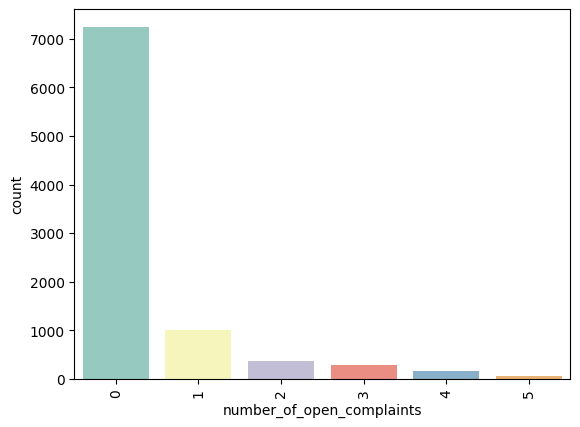

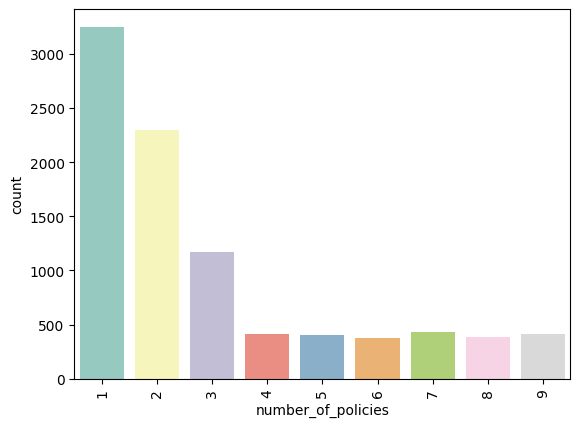

In [18]:
# Apply function for discrete values

plot_discrete(discrete_df)

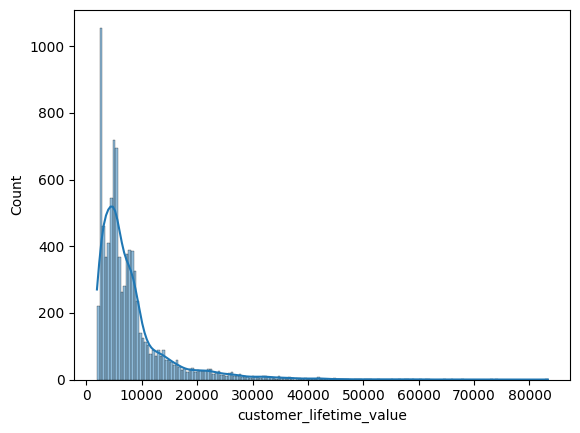

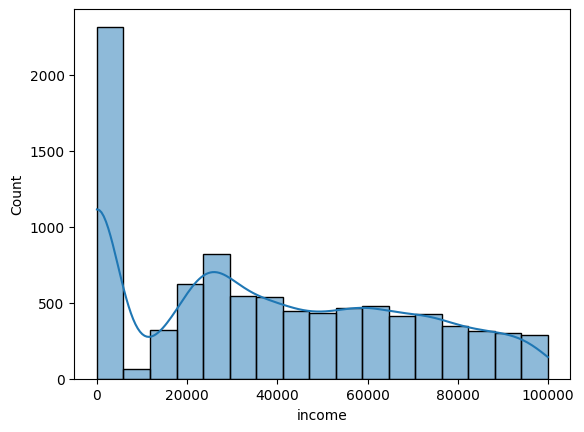

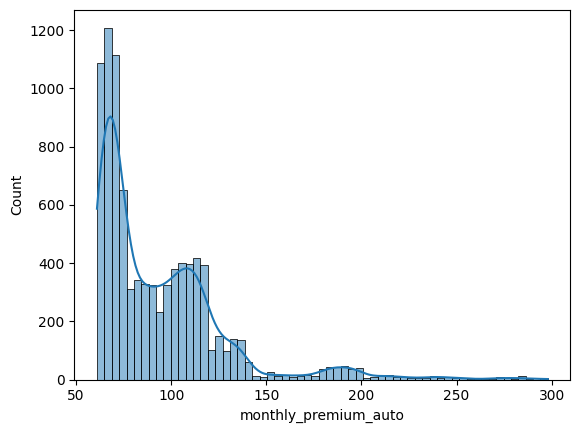

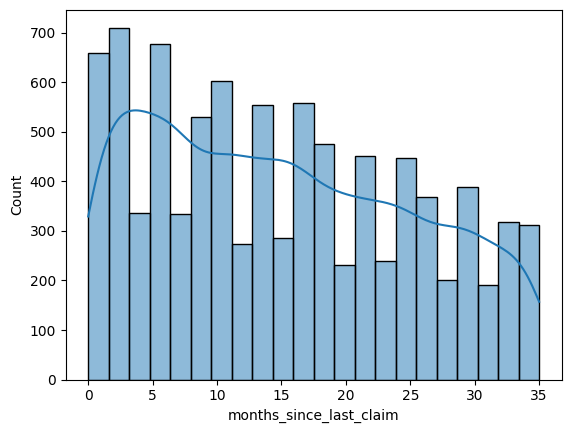

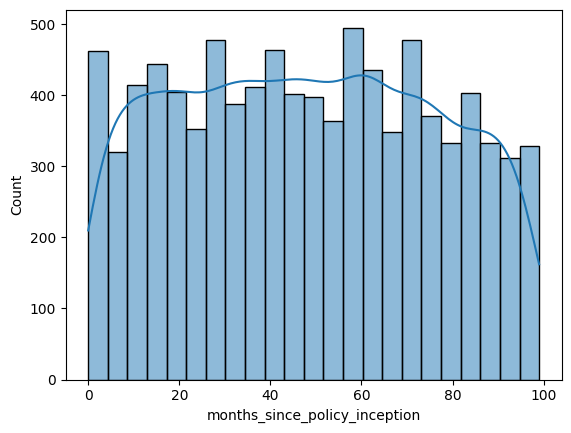

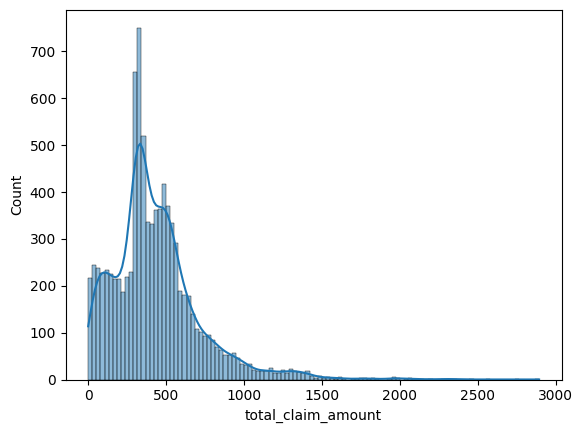

In [19]:
# Apply function for continuous values

plot_continuous(continuous_df)

## 10. Comment what you can see in the plots.

### Discrete plots:

**1. Number of Open Complaints:** This discrete bar chart shows that the vast majority of records have 0 open complaints, suggesting that customers generally do not have ongoing issues.

**2. Number of Policies:** Another discrete distribution where most customers appear to have only 1 policy, with progressively fewer customers having 2 or more policies.

### Continuous plots:

**1. Customer Lifetime Value:** This histogram indicates that the customer lifetime value is right-skewed, with most customers having a lower lifetime value and a few customers having a very high lifetime value.

**2. Income:** Here we have a right-skewed distribution similar to the customer lifetime value, with a peak at the lower income range and a long tail toward the higher income range. The spike at 0 could indicate a large number of customers with no income recorded or possibly unemployed customers.

**3. Monthly Premium Auto:** This plot shows that the monthly auto premium is positively skewed, with most of the premiums clustered at the lower end and some premiums extending to a much higher range.

**4. Months Since Last Claim:** This histogram is more uniformly distributed, suggesting that the time since the last claim is spread out more evenly across the customers, with slight peaks around 10 and 20 months.

**5. Months Since Policy Inception:** The distribution is quite uniform, indicating that the dataset includes a wide range of customers, from new to long-term clients, without obvious clustering at specific time periods.

**6. Total Claim Amount:** This is another right-skewed distribution. Most claims are of lower amount, with a few claims that are much higher in comparison.

#### In resume:

None of the variables appear to follow a typical normal distribution. All of them exhibit some degree of right-skewness, and in the case of income, there is also a concentration of low values. Therefore, if we intend to use these variables in statistical analyses or models that assume normality, we may need to perform data transformations to achieve a better approximation to normality.

- Additionally, the concentration of customers with zero open complaints and only one policy could influence decisions related to customer service and marketing strategies.

## 11. Look for outliers in the continuous variables. 
(HINT: There’s a good plot to do that!)

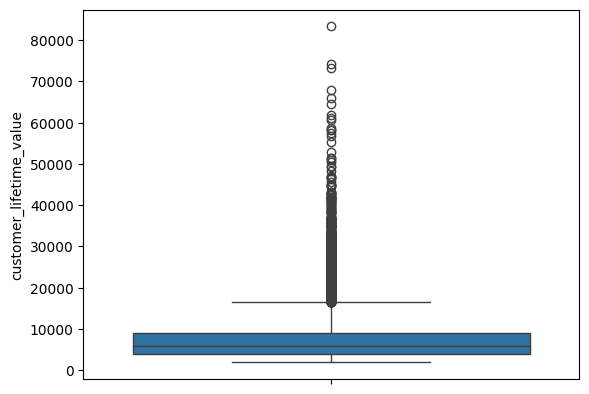

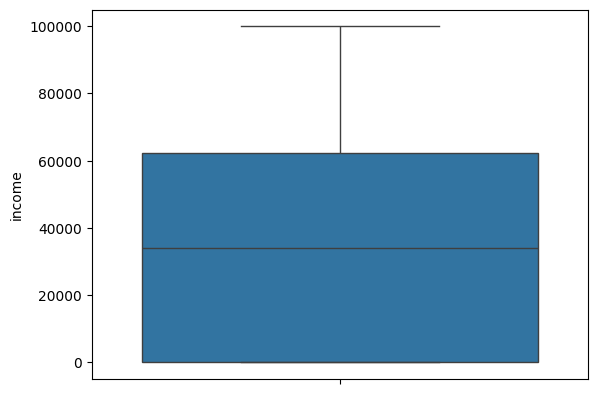

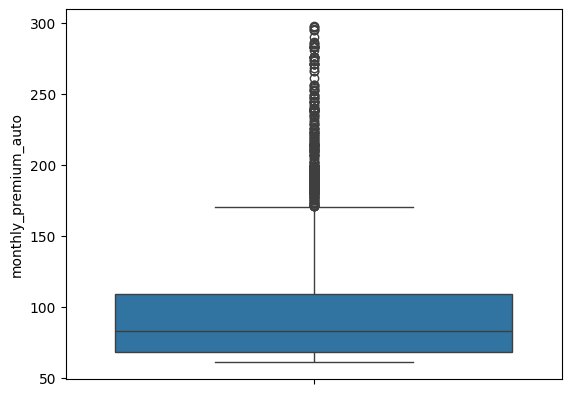

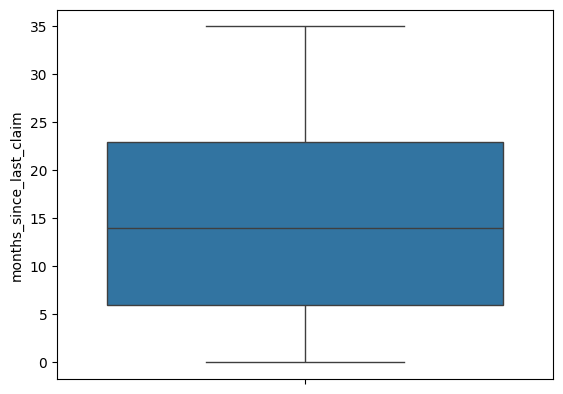

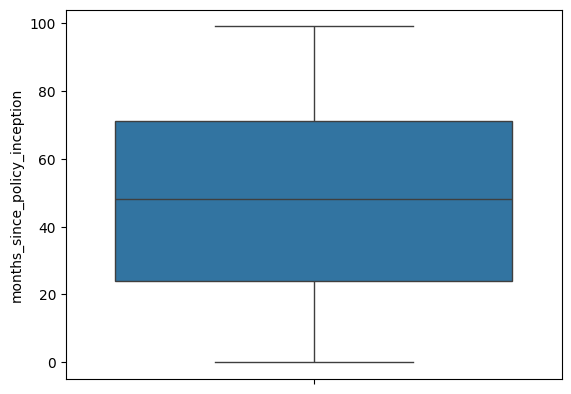

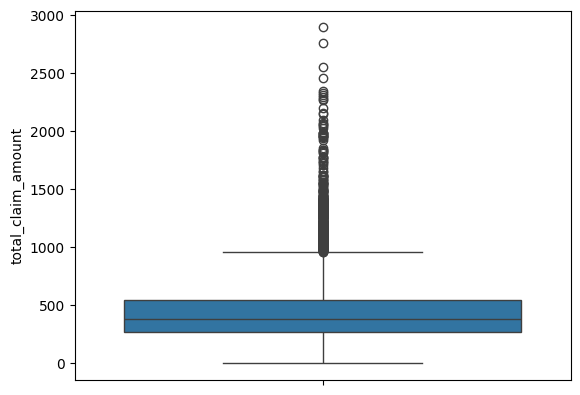

In [20]:
for column in continuous_df.columns:
    sns.boxplot(y=continuous_df[column], orient="horizontal")
    plt.show()

### Overview Observations:

#### Boxplot 1 (customer_lifetime_value)

- There are a **significant number of outliers** represented as individual points above the upper "whisker" of the boxplot.
- The line inside the box represents the median of the data, which appears to be near the lower edge of the box, indicating **data skewing towards higher values**.
- The box itself shows the interquartile range (IQR), which seems relatively small compared to the total range, indicating that **most values cluster near the median**.

#### Boxplot 2 (income)

- This boxplot displays **very little variability and does not seem to have any apparent outliers**.
- The median is at the center of the box, suggesting a **symmetric distribution** of data around the median.

#### Boxplot 3 (monthly_premium_auto)

- It shows **outliers**. 
- **Skewed median**. The median is not in the center of the box but closer to the lower edge. This doesn't mean it's skewed towards higher values but rather the opposite: it suggests a higher concentration of data lies in the lower range (below the median). In other words, there are more data points clustered below the median than above it.

#### Boxplot 4 (months_since_last_claim)

- This boxplot shows a situation similar to the two preceding ones, with **limited variability and no apparent outliers**.
- The median is centered, indicating a **symmetric distribution**.

#### Boxplot 5 (months_since_policy_inception)

- This plot displays a **distribution with slightly wider variability** than the previous boxplots.
- There are **no visible outliers**, and the **median is centered**.

#### Boxplot 6 (total_claim_amount)

- This boxplot is **the most varied of all**, with a **large number of outliers** extending above the upper whisker.
- The median is near the lower edge of the box, indicating a **skew towards higher values**.

## 12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

**Yes**, I found outliers in the following variables:

- customer_lifetime_value
- monthly_premium_auto
- total_claim_amount

From the distribution and box plot we can infer that:

- Customer Lifetime Value is highly right skewed. There are lot of outliers in our independent variable but we cant treat them directly because they are influential points.
- Monthly Premium Auto is highly right skewed. There are lot of outliers in our independent variable but we cant treat them directly because they are influential points.
- Total Claim Amount seems to have an abnormal distribution, the distribution is skew right, one value looks very high. The Boxplot show there are many outliers.

**While evaluating potential outliers to remove from the dataset, we should consider the following:**

- Is the outlier a measurement error or data entry error? If so, correct it manually where possible. If it’s unable to be corrected, it should be considered incorrect, and thus legitimately removed from the dataset.
- Is the outlier a natural part of the data population being analyzed? If not, we should remove it.
- Can we explain our reasoning for removing an outlier? If not, we should not remove it. When removing outliers, we should provide documentation of the excluded data points, giving reasoning for our choices.

**We will eventually want to get rid of the them to get a normal distribution of the variables for machine learning.**

In [21]:
numerical_df.shape

(9134, 8)

In [22]:
numerical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


### Logarithmic transformation to features

#### customer_lifetime_value

In [23]:
# Logarithmic transformation to reduce the influence of extreme values and biases in positive data.
# Also for more readable data
# This function performs a logarithmic transformation for positive values and returns NaN for invalid (non-positive)
# values to prevent mathematical issues. 

def log_transfom_clean(x):
    if x>0:
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

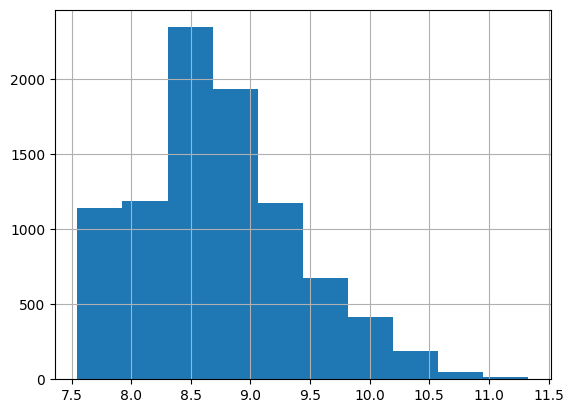

In [24]:
pd.Series(numerical_df['customer_lifetime_value'].apply(log_transfom_clean)).hist()
plt.show()

In [25]:
numerical_df["customer_lifetime_value_transformed"] = numerical_df["customer_lifetime_value"].apply(log_transfom_clean)
numerical_df["customer_lifetime_value_transformed"].head()

0    7.924260
1    8.850738
2    9.464008
3    8.941920
4    7.942253
Name: customer_lifetime_value_transformed, dtype: float64

In [26]:
numerical_df["customer_lifetime_value_transformed"].mean()

8.748561782441605

In [27]:
numerical_df["customer_lifetime_value_transformed"].median()

8.662190483141934

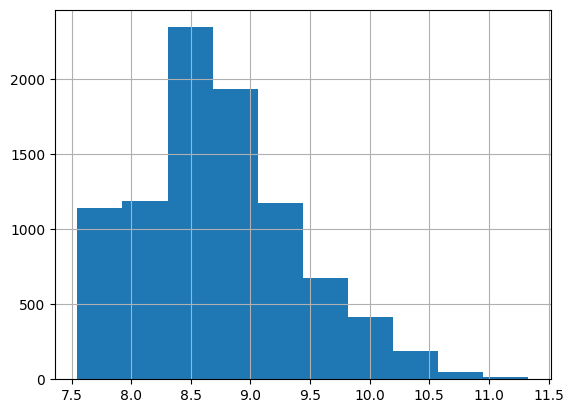

In [28]:
numerical_df['customer_lifetime_value_transformed'] = numerical_df['customer_lifetime_value_transformed'].fillna(np.median(numerical_df['customer_lifetime_value_transformed']))
numerical_df['customer_lifetime_value_transformed'].hist()
plt.show()

In [29]:
numerical_df['customer_lifetime_value_transformed'].value_counts(dropna=False)

8.881929    6
9.769815    6
7.717996    6
8.998740    6
8.708982    6
           ..
9.122827    1
7.772394    1
8.835625    1
9.203806    1
7.867809    1
Name: customer_lifetime_value_transformed, Length: 8041, dtype: int64

In [30]:
np.nanpercentile(numerical_df['customer_lifetime_value_transformed'],75)

9.100767326620565

In [31]:
numerical_df["customer_lifetime_value_transformed"].describe().T

count    9134.000000
mean        8.748562
std         0.652919
min         7.548560
25%         8.292612
50%         8.662190
75%         9.100767
max        11.330508
Name: customer_lifetime_value_transformed, dtype: float64

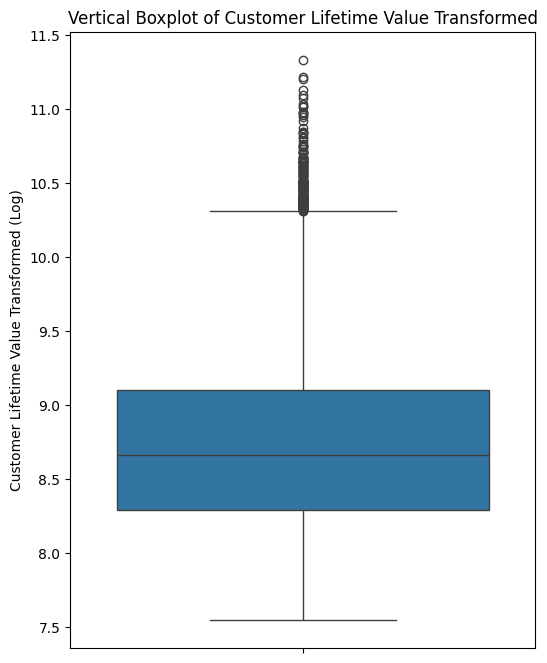

In [32]:
plt.figure(figsize=(6, 8))  
sns.boxplot(y='customer_lifetime_value_transformed', data=numerical_df, orient='v')
plt.ylabel('Customer Lifetime Value Transformed (Log)')
plt.title('Vertical Boxplot of Customer Lifetime Value Transformed')
plt.show()

#### monthly_premium_auto

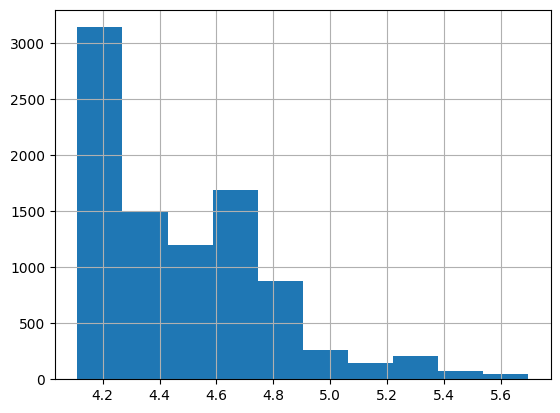

In [33]:
pd.Series(numerical_df['monthly_premium_auto'].apply(log_transfom_clean)).hist()
plt.show()

In [34]:
numerical_df["monthly_premium_auto_transformed"] = numerical_df["monthly_premium_auto"].apply(log_transfom_clean)
numerical_df["monthly_premium_auto_transformed"].head()

0    4.234107
1    4.543295
2    4.682131
3    4.663439
4    4.290459
Name: monthly_premium_auto_transformed, dtype: float64

In [35]:
numerical_df["monthly_premium_auto_transformed"].mean()

4.482330324373687

In [36]:
numerical_df["monthly_premium_auto_transformed"].median()

4.418840607796598

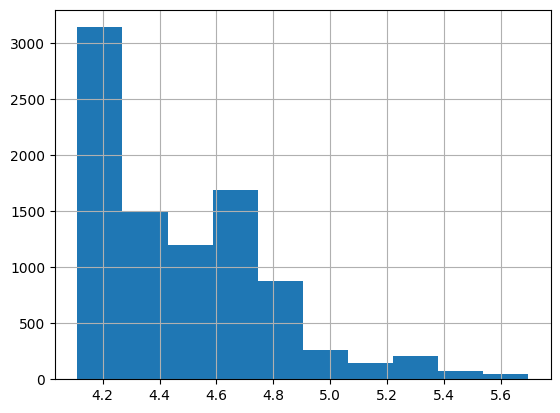

In [37]:
numerical_df['monthly_premium_auto_transformed'] = numerical_df['monthly_premium_auto_transformed'].fillna(np.median(numerical_df['monthly_premium_auto_transformed']))
numerical_df['monthly_premium_auto_transformed'].hist()
plt.show()

In [38]:
numerical_df['monthly_premium_auto_transformed'].value_counts(dropna=False)

4.174387    348
4.189655    307
4.262680    304
4.290459    302
4.143135    289
           ... 
5.609472      1
5.659482      1
5.590987      1
5.446737      1
5.655992      1
Name: monthly_premium_auto_transformed, Length: 202, dtype: int64

In [39]:
np.nanpercentile(numerical_df['monthly_premium_auto_transformed'],75)

4.6913478822291435

In [40]:
numerical_df["monthly_premium_auto_transformed"].describe().T

count    9134.000000
mean        4.482330
std         0.308007
min         4.110874
25%         4.219508
50%         4.418841
75%         4.691348
max         5.697093
Name: monthly_premium_auto_transformed, dtype: float64

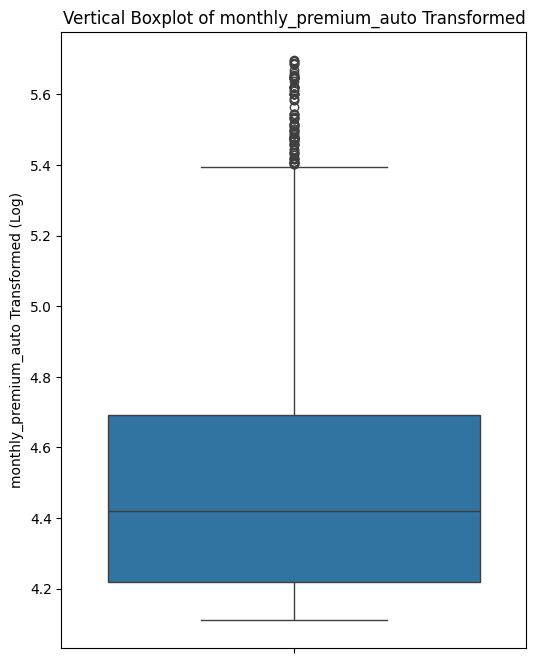

In [41]:
plt.figure(figsize=(6, 8))  
sns.boxplot(y='monthly_premium_auto_transformed', data=numerical_df, orient='v')
plt.ylabel('monthly_premium_auto Transformed (Log)')
plt.title('Vertical Boxplot of monthly_premium_auto Transformed')
plt.show()

### Handle Outliers

In [42]:
# Checking how many values will be removed if the outliers are removed from customer lifetime value

iqr = np.nanpercentile(numerical_df['customer_lifetime_value_transformed'],75) - np.nanpercentile(numerical_df['customer_lifetime_value_transformed'],25)
upper_limit = np.nanpercentile(numerical_df['customer_lifetime_value_transformed'],75) + 1.5*iqr
print(upper_limit)
print(iqr)

10.313001003057334
0.8081557842911788


In [43]:
extraordinary_points = numerical_df[numerical_df['customer_lifetime_value_transformed'] > upper_limit]
rows = len(extraordinary_points)  # This checks the number of points that will be removed

In [44]:
# Checking how many values will be removed if the outliers are removed from monthly premium auto

iqr2 = np.nanpercentile(numerical_df['monthly_premium_auto_transformed'],75) - np.nanpercentile(numerical_df['monthly_premium_auto_transformed'],25)
upper_limit2 = np.nanpercentile(numerical_df['monthly_premium_auto_transformed'],75) + 1.5*iqr2
print(upper_limit2)
print(iqr2)

5.399108147808699
0.4718401770530365


In [45]:
extraordinary_points2 = numerical_df[numerical_df['monthly_premium_auto'] > upper_limit2]
rows2 = len(extraordinary_points2)  

In [46]:
# If we remove outliers we will remove this amount of rows

print("Rows that will be removed from CLV if we drop outliers using an upper limit:", rows)
print("Rows that will be removed from MPA if we drop outliers using an upper limit:", rows2)

Rows that will be removed from CLV if we drop outliers using an upper limit: 185
Rows that will be removed from MPA if we drop outliers using an upper limit: 9134


In [47]:
# It's a lot of data that we will lost if we do so
# So we don't have to lose so much data, we establish an other limit for what is considered an outlier

In [48]:
extraordinary_points = numerical_df[numerical_df['customer_lifetime_value_transformed'] > 11]
rows_1 = len(extraordinary_points)

In [49]:
extraordinary_points2 = numerical_df[numerical_df['monthly_premium_auto_transformed'] > 5.5]
rows_2 = len(extraordinary_points2)  

In [50]:
print("Rows that will be removed from CLV:", rows_1)
print("Rows that will be removed from MPA:", rows_2)

Rows that will be removed from CLV: 9
Rows that will be removed from MPA: 57


### I have reviewed several options for removing the outliers, but I've noticed that we lose a lot of data, and I don't have a complete understanding of all the information to determine if it's appropriate to delete them. So, I decide to continue with them.

## 13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

In [51]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

**We don't have NaN values.**

## Checking before saving

In [52]:
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer_lifetime_value_transformed,monthly_premium_auto_transformed
0,2763.519279,56274,69,32,5,0,1,384.811147,7.924260,4.234107
1,6979.535903,0,94,13,42,0,8,1131.464935,8.850738,4.543295
2,12887.431650,48767,108,18,38,0,2,566.472247,9.464008,4.682131
3,7645.861827,0,106,18,65,0,7,529.881344,8.941920,4.663439
4,2813.692575,43836,73,12,44,0,1,138.130879,7.942253,4.290459
...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,10.060747,4.290459
9130,3096.511217,21604,79,14,28,0,1,379.200000,8.038031,4.369448
9131,8163.890428,0,85,9,37,3,2,790.784983,9.007476,4.442651
9132,7524.442436,21941,96,34,3,0,3,691.200000,8.925912,4.564348


I have to drop customer_lifetime_value_transformed and monthly_premium_auto_transformed which I got from doing a logarithmic transformation while trying to handle the outliers.

In [53]:
# Delete specific columns by name
numerical_df = numerical_df.drop(['customer_lifetime_value_transformed', 'monthly_premium_auto_transformed'], axis=1)

In [54]:
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


## 14. Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [55]:
numerical_df.to_csv('numerical.csv', index=False)

# Lab | Cleaning categorical data


#### Data Analysis Process:
- Case Study
- Get data
- Cleaning/Wrangling/EDA
- Processing Data
- Modeling -Validation
- Reporting

#### Instructions:

1. Find all of the categorical data. Save it in a categorical_df variable.

2. Check for NaN values and decide what to do with them, do it now.

3. Check all unique values of columns.

4. Check dtypes. Do they all make sense as categorical data?

5. Does any column contain alpha and numeric data? Decide how to clean it and do it now.

6. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.

7. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

8. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

9. Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

## 1. Find all of the categorical data. Save it in a categorical_df variable.

In [56]:
categorical_df = customer_df.select_dtypes(include=['object', 'category'])

In [57]:
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [58]:
categorical_df.shape

(9134, 15)

In [59]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer          9134 non-null   object
 1   state             9134 non-null   object
 2   response          9134 non-null   object
 3   coverage          9134 non-null   object
 4   education         9134 non-null   object
 5   employmentstatus  9134 non-null   object
 6   gender            9134 non-null   object
 7   location_code     9134 non-null   object
 8   marital_status    9134 non-null   object
 9   policy_type       9134 non-null   object
 10  policy            9134 non-null   object
 11  renew_offer_type  9134 non-null   object
 12  sales_channel     9134 non-null   object
 13  vehicle_class     9134 non-null   object
 14  vehicle_size      9134 non-null   object
dtypes: object(15)
memory usage: 1.0+ MB


## 2. Check for NaN values and decide what to do with them, do it now.

In [60]:
categorical_df.isna().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [61]:
# There are non NaN values

## 3. Check all unique values of columns.

In [62]:
for column in categorical_df.columns:
    print(column, categorical_df[column].unique())

customer ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
state ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response ['No' 'Yes']
coverage ['Basic' 'Extended' 'Premium']
education ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
employmentstatus ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
gender ['F' 'M']
location_code ['Suburban' 'Rural' 'Urban']
marital_status ['Married' 'Single' 'Divorced']
policy_type ['Corporate Auto' 'Personal Auto' 'Special Auto']
policy ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
renew_offer_type ['Offer1' 'Offer3' 'Offer2' 'Offer4']
sales_channel ['Agent' 'Call Center' 'Web' 'Branch']
vehicle_class ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
vehicle_size ['Medsize' 'Small' 'Large']


In [63]:
categorical_df.nunique()

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

## 4. Check dtypes. Do they all make sense as categorical data?

In [64]:
categorical_df.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [65]:
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


**Yes, they all make sense as categorical data.**

## 5. Does any column contain alpha and numeric data? Decide how to clean it and do it now.

Yes, columns with alphanumeric data:

- customer
- policy
- renewer_offer_type

In [66]:
def contains_alpha_and_numeric(series):
    return series.str.contains('[A-Za-z]') & series.str.contains('[0-9]')

In [67]:
alpha_numeric_columns = {column: contains_alpha_and_numeric(categorical_df[column]).any() for column in categorical_df.columns if categorical_df[column].dtype == 'object'}
alpha_numeric_columns

{'customer': True,
 'state': False,
 'response': False,
 'coverage': False,
 'education': False,
 'employmentstatus': False,
 'gender': False,
 'location_code': False,
 'marital_status': False,
 'policy_type': False,
 'policy': True,
 'renew_offer_type': True,
 'sales_channel': False,
 'vehicle_class': False,
 'vehicle_size': False}

In [68]:
# We can drop customer column since we don't need it for the model

categorical_df = categorical_df.drop("customer",axis=1)
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [69]:
# As the column 'policy' contains redundant information that is already in the column policy_type
# We can replace it by the values: "1", "2" or "3"

categorical_df.groupby(['policy_type', 'policy'])['policy'].count()
categorical_df['policy'] = np.where(categorical_df['policy'] == 'Corporate L1','1', categorical_df['policy'])
categorical_df['policy'] = np.where(categorical_df['policy'] == 'Corporate L2','2', categorical_df['policy'])
categorical_df['policy'] = np.where(categorical_df['policy'] == 'Corporate L3','3', categorical_df['policy'])
categorical_df['policy'] = np.where(categorical_df['policy'] == 'Personal L1','1', categorical_df['policy'])
categorical_df['policy'] = np.where(categorical_df['policy'] == 'Personal L2','2', categorical_df['policy'])
categorical_df['policy'] = np.where(categorical_df['policy'] == 'Personal L3','3', categorical_df['policy'])
categorical_df['policy'] = np.where(categorical_df['policy'] == 'Special L1','1', categorical_df['policy'])
categorical_df['policy'] = np.where(categorical_df['policy'] == 'Special L2','2', categorical_df['policy'])
categorical_df['policy'] = np.where(categorical_df['policy'] == 'Special L3','3', categorical_df['policy'])

In [70]:
# Check cleaned values

categorical_df['policy'].value_counts(dropna = False)

3    4588
2    2881
1    1665
Name: policy, dtype: int64

In [71]:
# Also for renewer_offer_type we can replace the values by: "1", "2", "3" or "4"
# The column name indicates that we are talking about offers 
# so I think it's not necessary to include "Offer" in the value

In [72]:
categorical_df['renew_offer_type'].unique()

array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object)

In [73]:
# Create a mapping dictionary to replace values
mapping = {'Offer1': 1, 'Offer3': 3, 'Offer2': 2, 'Offer4': 4}

# Use the replace method to apply the mapping to the 'renew_offer_type' column
categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].replace(mapping)

In [74]:
categorical_df['renew_offer_type'].unique()

array([1, 3, 2, 4])

In [75]:
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,3,1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,3,3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,3,1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,2,1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,1,1,Agent,Four-Door Car,Medsize


In [76]:
categorical_df.shape

(9134, 14)

In [77]:
categorical_df.dtypes

state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type     int64
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [78]:
# Convert the 'renew_offer_type' column back to 'object' type
categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].astype('object')

In [79]:
categorical_df.dtypes

state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

## 6. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.

**Yes, I will group some values (the ones with the less amount of values) in some columns:**

- 'education': 'Master' and 'Doctor' into 'Postgraduate'.
- 'employmentstatus': 'Medical Leave', 'Disabled' and 'Retired' into 'Other'.
- 'vehicle_class': 'Sports Car', 'Luxury SUV' and 'Luxury Car' into 'Luxury'.

In [80]:
categorical_df['education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [81]:
categorical_df['education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [82]:
categorical_df['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [83]:
categorical_df['employmentstatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [84]:
categorical_df['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

In [85]:
categorical_df['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [86]:
# Group values in the 'education' column
categorical_df['education'].replace({'Master': 'Postgraduate', 'Doctor': 'Postgraduate'}, inplace=True)

# Group values in the 'employmentstatus' column
categorical_df['employmentstatus'].replace({'Medical Leave': 'Other', 'Disabled': 'Other', 'Retired': 'Other'}, inplace=True)

# Group values in the 'vehicle_class' column
categorical_df['vehicle_class'].replace({'Sports Car': 'Luxury', 'Luxury SUV': 'Luxury', 'Luxury Car': 'Luxury'}, inplace=True)

In [87]:
# Checking the changes

categorical_df['education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Postgraduate            1083
Name: education, dtype: int64

In [88]:
categorical_df['employmentstatus'].value_counts()

Employed      5698
Unemployed    2317
Other         1119
Name: employmentstatus, dtype: int64

In [89]:
categorical_df['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Luxury            831
Name: vehicle_class, dtype: int64

In [90]:
for column in categorical_df.columns:
    print(column, categorical_df[column].unique())

state ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response ['No' 'Yes']
coverage ['Basic' 'Extended' 'Premium']
education ['Bachelor' 'College' 'Postgraduate' 'High School or Below']
employmentstatus ['Employed' 'Unemployed' 'Other']
gender ['F' 'M']
location_code ['Suburban' 'Rural' 'Urban']
marital_status ['Married' 'Single' 'Divorced']
policy_type ['Corporate Auto' 'Personal Auto' 'Special Auto']
policy ['3' '2' '1']
renew_offer_type [1 3 2 4]
sales_channel ['Agent' 'Call Center' 'Web' 'Branch']
vehicle_class ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury']
vehicle_size ['Medsize' 'Small' 'Large']


## 7. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [91]:
# Already identified in cell 66

## 8. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [92]:
# Check the number of unique values in each column
unique_counts = categorical_df.nunique()

# Display unique value counts
print(unique_counts)

state               5
response            2
coverage            3
education           4
employmentstatus    3
gender              2
location_code       3
marital_status      3
policy_type         3
policy              3
renew_offer_type    4
sales_channel       4
vehicle_class       4
vehicle_size        3
dtype: int64


Based on the number of unique values in each column, here are some thoughts on combining or encoding them to ease data processing:

1. state has 5 unique values, which are likely state names. This could potentially be one-hot encoded, as it represents categorical data with no clear order.

2. response has 2 unique values, possibly indicating binary responses (e.g., "Yes" and "No"). No changes needed.

3. coverage has 3 unique values, which represents different levels of insurance coverage ("Basic," "Extended," "Premium"). No changes needed.

4. education has 4 unique values and in previous steps I already grouped "Master" and "Doctor" into a "postgraduate" category to simplify encoding. 

5. employmentstatus has 3 unique values, which could potentially be one-hot encoded, as it represents categorical data with no clear order. I have already combined "Medical Leave," "Disabled," and "Retired" into an "other" category to reduce the number of categories.

6. gender has 2 unique values, representing binary gender categories. No changes needed.

7. location_code has 3 unique values, which represent different geographic locations. No changes needed.

8. marital_status has 3 unique values, which could potentially be one-hot encoded, as it represents categorical data with no clear order.

9. policy_type, policy, renew_offer_type, sales_channel, and vehicle_class each have a moderate number of unique values (ranging from 3 to 4). Depending on the specific context, we might want to explore the possibility of combining some of these categories into broader categories to simplify encoding.

10. vehicle_size has 3 unique values, representing different vehicle sizes ("Small," "Medsize," "Large"). No changes needed.

**I will check in this possibilities:**

policy_type, policy, renew_offer_type, sales_channel, and vehicle_class each have a moderate number of unique values (ranging from 3 to 4). Depending on the specific context, we might want to explore the possibility of combining some of these categories into broader categories to simplify encoding.

**Finally, I have decided not to make any further changes because it may be relevant for future analysis to leave it as it is.**

## Checking before saving

In [93]:
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,3,1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,3,3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,3,1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,2,1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,1,1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,1,2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,3,1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,2,1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,2,3,Branch,Four-Door Car,Large


In [94]:
categorical_df.dtypes

state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

## 9. Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

In [95]:
categorical_df.to_csv('categorical.csv', index=False)

# Lab | Feature extraction

#### Instructions

1. Open the categorical dataframe we created before.
2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
4. Make any changes you feel are necessary.
5. Plot time variable. Can you extract something from it?
6. The time variable can be useful. You shoud transform its data into a more useful form. Hint: Day, week, and month as integers might be useful.

## 1. Open the categorical dataframe we created before.

In [96]:
categorical_df = pd.read_csv('categorical.csv')

In [97]:
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,3,1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,3,3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,3,1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,2,1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,1,1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,1,2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,3,1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,2,1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,2,3,Branch,Four-Door Car,Large


## 2. Plot all the categorical variables with the proper plot. What can you see?

In [98]:
# For each categorical variable, a bar graph can help visualize the amount of each category.

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

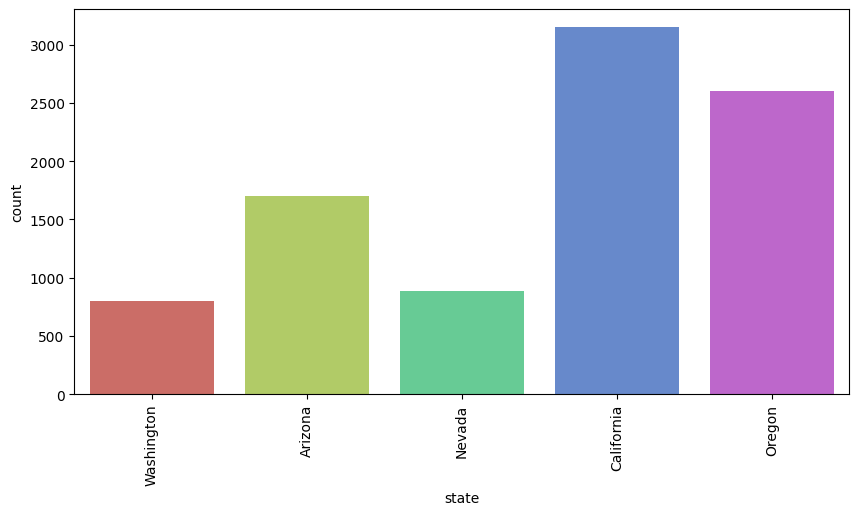

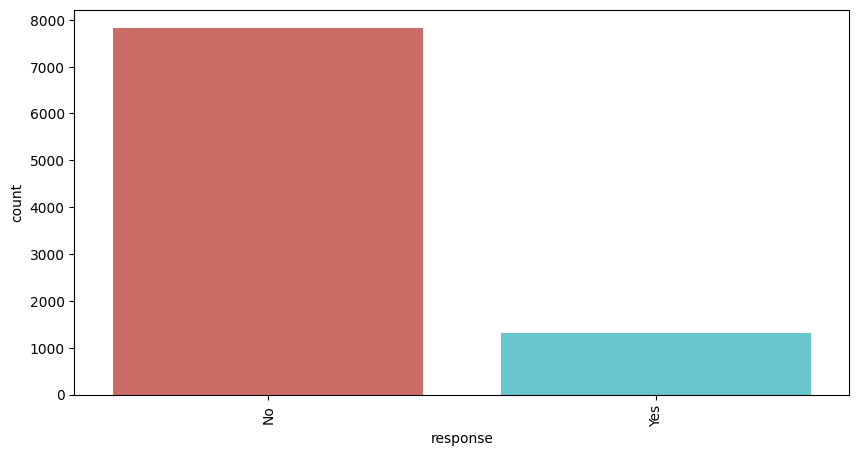

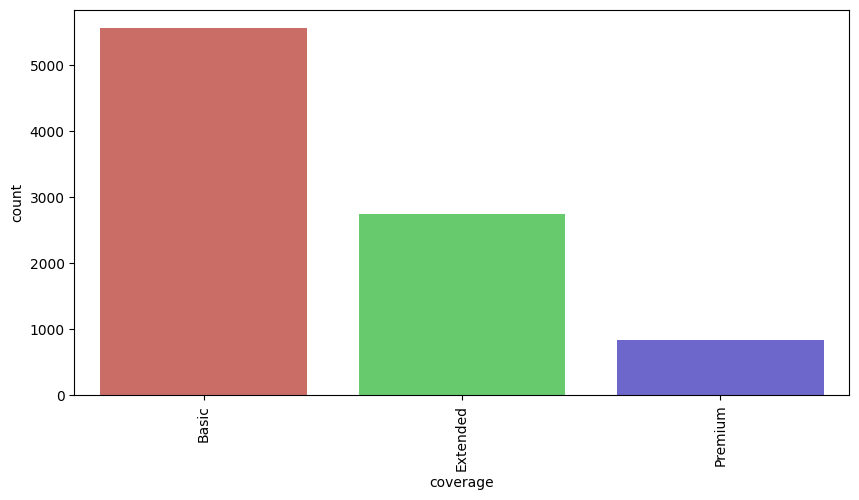

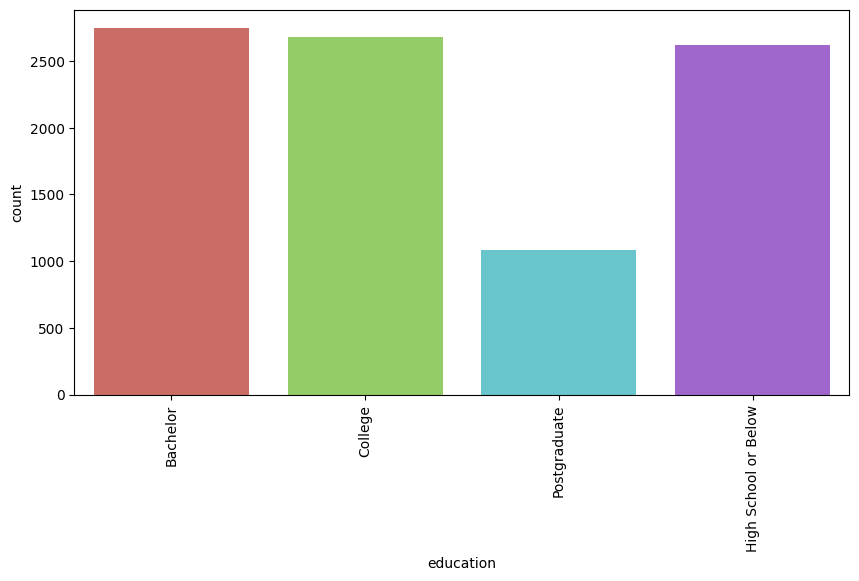

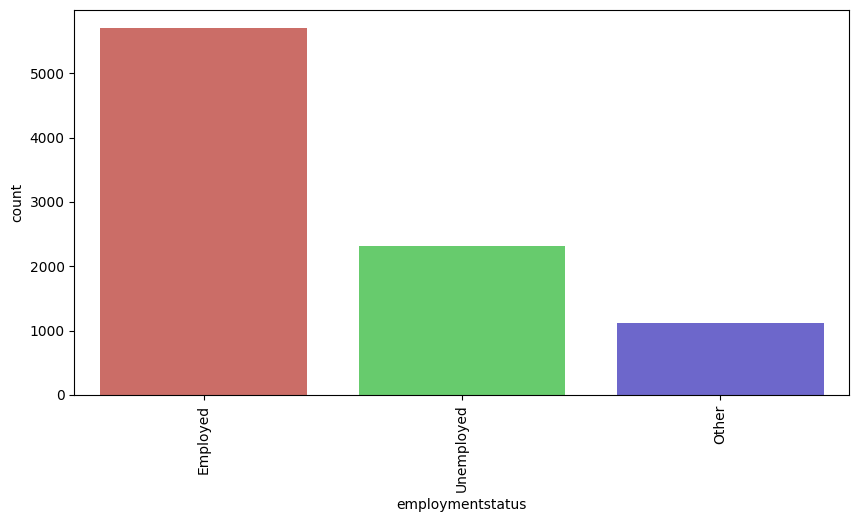

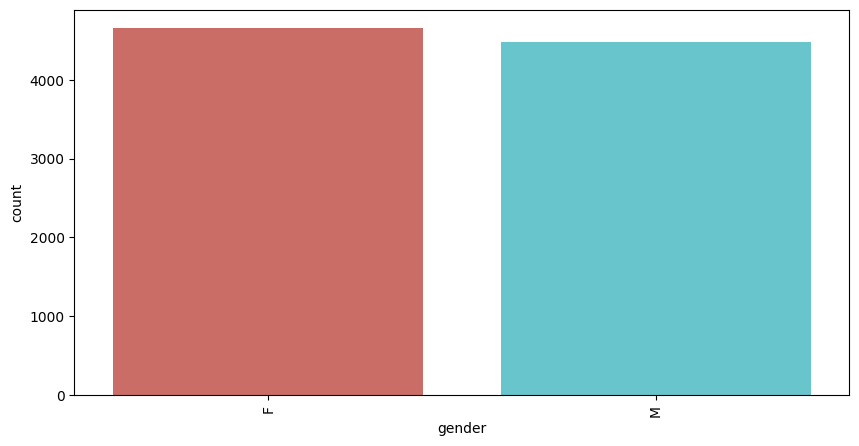

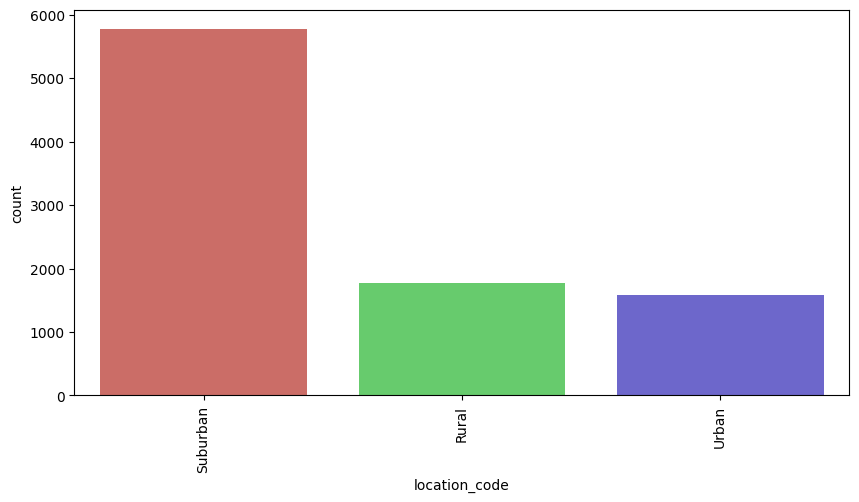

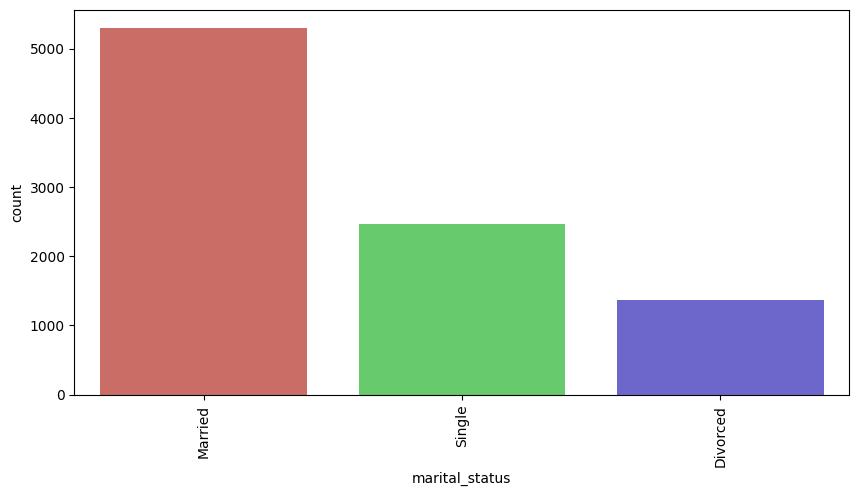

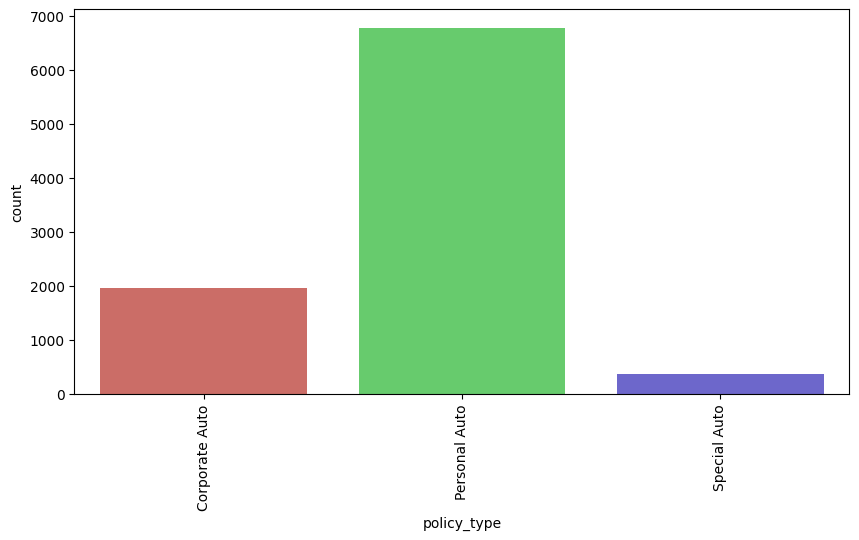

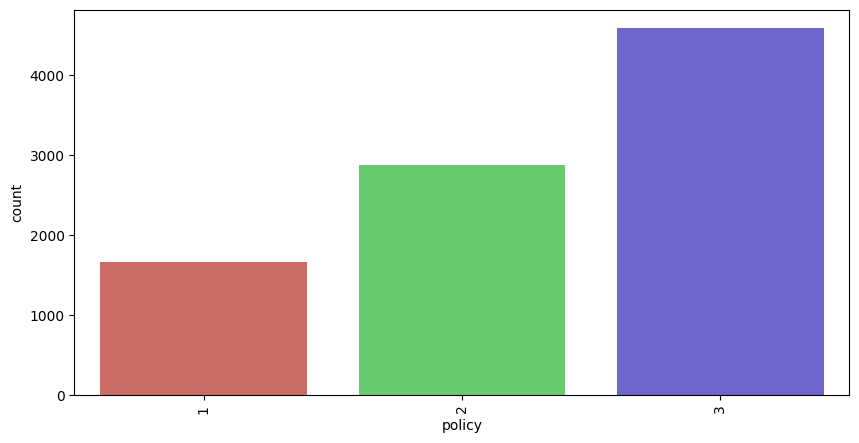

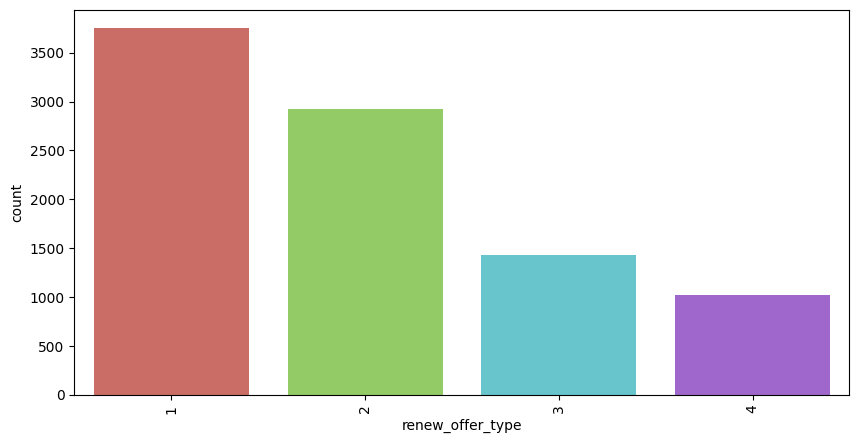

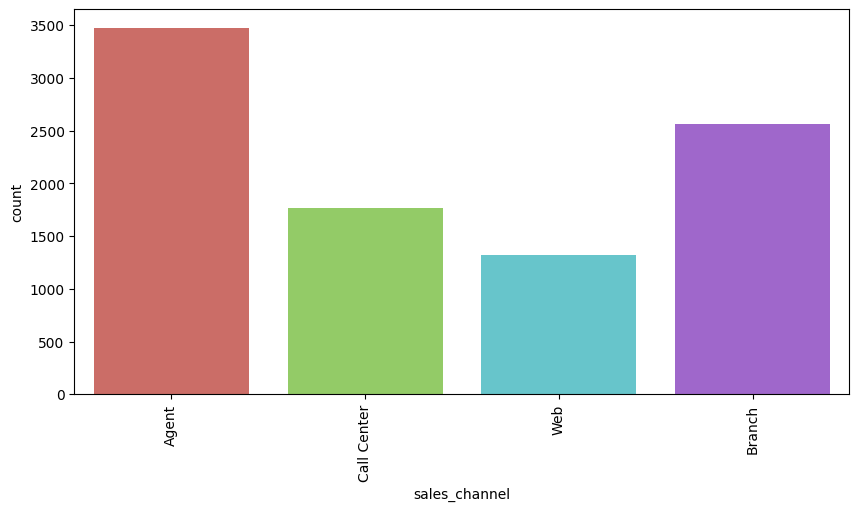

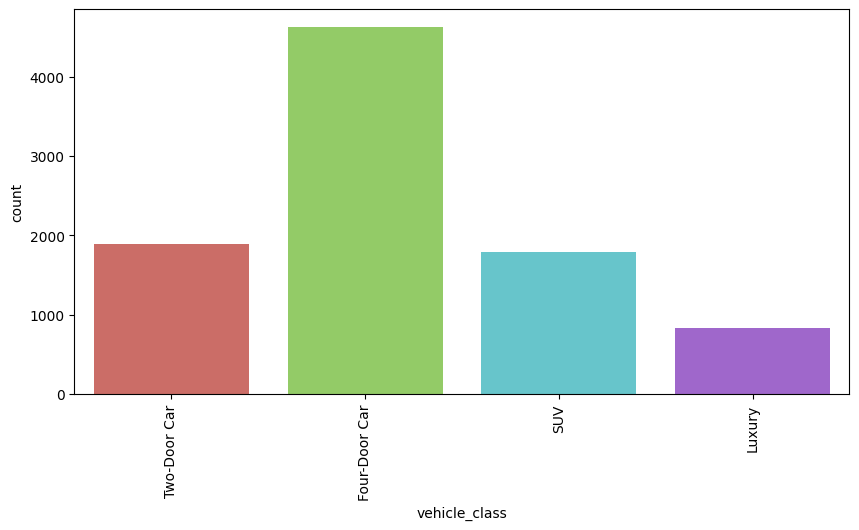

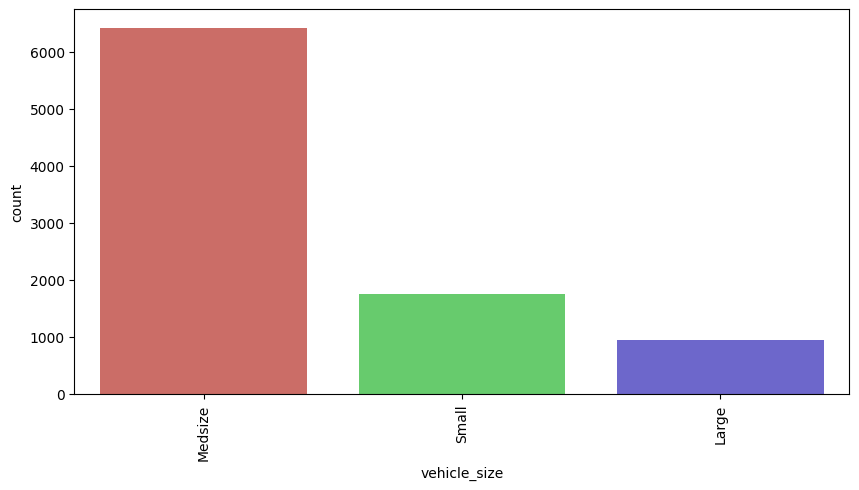

In [100]:
# Countplot for each column
for column in categorical_df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=categorical_df, x=column, palette='hls', dodge=False)
    plt.xticks(rotation=90)
    plt.show()

### Overview Observations:

Here are some observations and conclusions that we can infer from the provided bar charts for each categorical variable:

**State:** Some states clearly have more customers than others. It might be interesting to investigate why certain states have more customers, such as population, marketing strategy, or other factors.

**Response:** A large majority of customers have not responded or have a negative response in the "no" category. This could suggest that the company may want to review its customer engagement or satisfaction strategy.

**Coverage:** Most customers appear to have basic coverage, with fewer customers opting for extended or premium coverage. This could indicate a preference for more affordable insurance solutions or an opportunity for up-selling.

**Education:** There is a varied distribution in education levels. It could be useful to compare this with other variables such as income or policy types to see if there are patterns.

**Employment Status:** Most customers are employed, which could influence the type of insurance products they are willing to purchase or their ability to afford them.

**Gender:** The gender distribution appears fairly balanced.

**Location Code:** More customers seem to be in suburban areas, followed by rural and urban areas.

**Marital Status:** There are more married customers than single or divorced customers.

**Policy Type:** Customers largely prefer personal auto policies.

**Policy:** There is a variety of selected policies, with some more popular than others.

**Renew Offer Type:** Offer 1 appears to be the most popular, suggesting it may have the most attractive terms or the most promotion.

**Sales Channel:** The agent sales channel is the most used, followed by the branch, which is interesting in the digital age. It could suggest a customer preference for a more personalized experience or could be an area for improving the digital presence.

**Vehicle Class:** Four-door cars are the most common, indicating a market of customers who prefer practical or family vehicles over luxury or sports cars.

**Vehicle Size:** Medium-sized vehicles dominate the distribution, suggesting that most customers prefer this size, possibly because it's a middle ground in terms of space and operating costs.

These observations can be useful for developing more targeted marketing strategies, creating customer profiles, or even adjusting the product portfolio to better meet customer needs. Additionally, identifying the most and least popular categories can help the company identify where growth or improvement opportunities may lie.

## 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [101]:
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,3,1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,3,3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,3,1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,2,1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,1,1,Agent,Four-Door Car,Medsize


In [102]:
# Review the variance of each column to identify columns with low variance
for column in categorical_df.columns:
    # Calculate the variance of the column
    column_var = categorical_df[column].value_counts(normalize=True)
        
    # Check if the most frequent category accounts for more than 95% of the data
    if column_var.iloc[0] > 0.95:
        print(f'The {column} column is highly imbalanced and may not be useful.')
    else:
        print(f'The {column} column may be useful.')

The state column may be useful.
The response column may be useful.
The coverage column may be useful.
The education column may be useful.
The employmentstatus column may be useful.
The gender column may be useful.
The location_code column may be useful.
The marital_status column may be useful.
The policy_type column may be useful.
The policy column may be useful.
The renew_offer_type column may be useful.
The sales_channel column may be useful.
The vehicle_class column may be useful.
The vehicle_size column may be useful.


Based on their variances:

I will keep most of the columns as they are since they seem to have sufficient variation and could contribute to a predictive model.

For 'policy_type' and 'policy,' I want to explore the nature of their relationship further. If I see that one column is simply a more detailed version of the other, I could choose to keep only one. For example, if 'policy_type' is always 'Personal Auto' when 'policy' is '3', then I may consider removing 'policy_type'.

In [103]:
from scipy.stats import chi2_contingency

In [104]:
# For columns that may be redundant, perform a chi-squared test
# to determine if there is independence between categorical columns
# For example, between 'policy_type' and 'policy'
crosstab = pd.crosstab(categorical_df['policy_type'], categorical_df['policy'])
chi2, p, dof, ex = chi2_contingency(crosstab)
print(f'P-value of the chi-squared test between policy_type and policy: {p}')

# If the p-value is greater than 0.05, the variables may be considered independent

P-value of the chi-squared test between policy_type and policy: 1.1649548767572253e-05


Based on the chi-squared test maybe we can say that 'policy' looks redundant and we can remove it but because of my lack of knowledge I will leave the columns as they are for now.

## 4. Make any changes you feel are necessary.

Context and the purpose of the analysis are key when making these decisions. While statistics provide guidance, the relevance of each variable will depend on what we are trying to understand or predict with our data.

I decided do not make any changee because of my lack of understanding on the subject.

## 5. Plot time variable. Can you extract something from it?

In [105]:
# Adding this column from the original dataframe customer_df
customer_df.shape[0] == categorical_df.shape[0] 
categorical_df["effective_to_date"] = customer_df["effective_to_date"]
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_date
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,3,1,Agent,Two-Door Car,Medsize,2011-02-24
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,3,3,Agent,Four-Door Car,Medsize,2011-01-31
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,3,1,Agent,Two-Door Car,Medsize,2011-02-19
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,2,1,Call Center,SUV,Medsize,2011-01-20
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,1,1,Agent,Four-Door Car,Medsize,2011-02-03


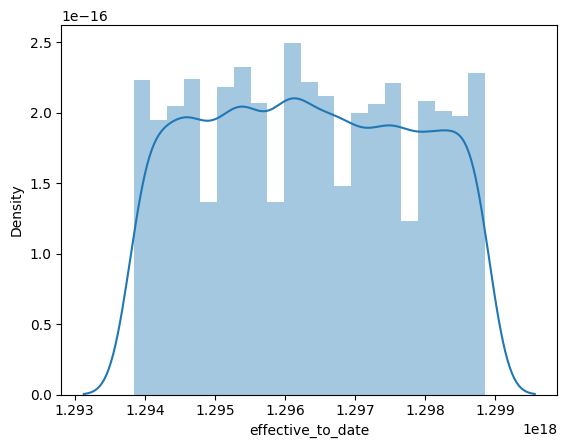

In [106]:
sns.distplot(categorical_df["effective_to_date"])
plt.show()

It's very difficult to make an interpretation of this.

## 6. The time variable can be useful. You shoud transform its data into a more useful form. 
Hint: Day, week, and month as integers might be useful.

In [107]:
# Creating new columns for day, week and month 
categorical_df['day_of_week'] = categorical_df['effective_to_date'].dt.dayofweek 
categorical_df['week_number'] = categorical_df['effective_to_date'].dt.week
categorical_df['month_number'] = categorical_df['effective_to_date'].dt.month

In [108]:
# Dropping the original 'effective_to_date' column
categorical_df = categorical_df.drop(['effective_to_date'], axis = 1)
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day_of_week,week_number,month_number
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,3,1,Agent,Two-Door Car,Medsize,3,8,2
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,3,3,Agent,Four-Door Car,Medsize,0,5,1
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,3,1,Agent,Two-Door Car,Medsize,5,7,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,2,1,Call Center,SUV,Medsize,3,3,1
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,1,1,Agent,Four-Door Car,Medsize,3,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,1,2,Web,Four-Door Car,Medsize,3,6,2
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,3,1,Branch,Four-Door Car,Medsize,5,6,2
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,2,1,Branch,Four-Door Car,Medsize,6,5,2
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,2,3,Branch,Four-Door Car,Large,3,5,2


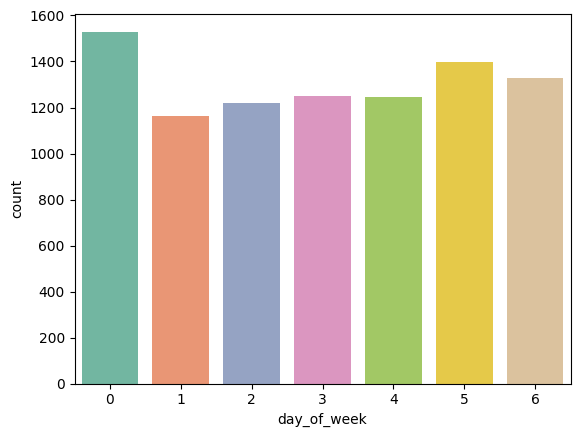

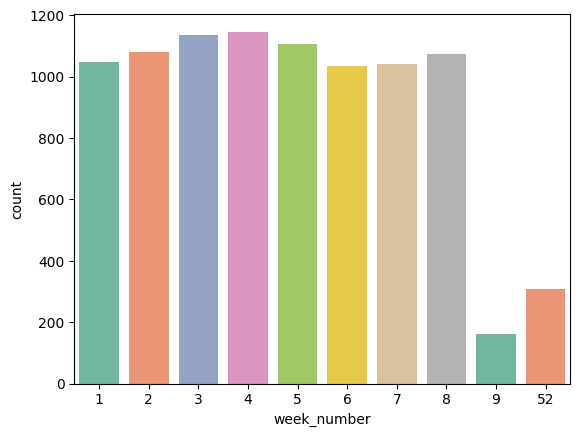

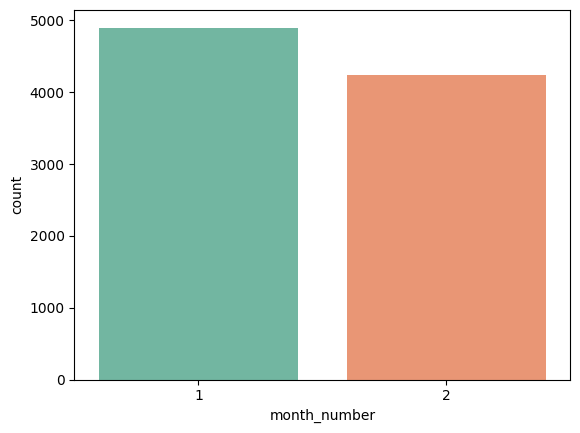

In [109]:
# Plotting the new form of data

# Define a custom color palette
custom_palette = sns.color_palette("Set2")

# Bar plot for 'day_of_week' 
sns.countplot(x='day_of_week', data=categorical_df, palette=custom_palette)
plt.show()

# Bar plot for 'week_number' 
sns.countplot(x='week_number', data=categorical_df, palette=custom_palette)
plt.show()

# Bar plot for 'month_number'
sns.countplot(x='month_number', data=categorical_df, palette=custom_palette)
plt.show()

In [110]:
# Check the value counts for each column
display(categorical_df['day_of_week'].value_counts(dropna = False))
display(categorical_df['week_number'].value_counts(dropna = False))
display(categorical_df['month_number'].value_counts(dropna = False))

0    1530
5    1397
6    1330
3    1249
4    1245
2    1221
1    1162
Name: day_of_week, dtype: int64

4     1147
3     1137
5     1105
2     1079
8     1073
1     1049
7     1040
6     1035
52     308
9      161
Name: week_number, dtype: int64

1    4898
2    4236
Name: month_number, dtype: int64

- As we saw in the week_number plot, between the week 9 and 52 there's a gap. Maybe the 52 is a type error and it should be a "2" or a "5" instead of "52".

- And for months, we only have observations for the months 1 and 2.

In [111]:
# Save my changes to a new file because I want to keep the original dataframe intact

categorical_df.to_csv('categorical_data_cleaned.csv', index=False)